In [74]:
%matplotlib inline
def equation1(x):
    '''
    Takes in any number and performs this equation on it.
    I made sure to make the 2/3 power floats, otherwise it
    would have rounded that power and made my calculation
    wrong.
    
    INPUT : Integer or float
    OUTPUT : Result of the equation
    '''
    
    f = (x ** 3) + (x ** (2./3.))
    return f


In [75]:
equation1(5)

127.92401773821287

In [76]:
equation1(1)

2.0

In [77]:
equation1(1.5)

4.685370697104448

In [78]:
def simpson(alim, blim):
    '''
    As not to mess up order of operations, I split the Simpson rule into chunks.
    Each one handles a different part of the equation. Also, I made sure to divide by
    floats, not integers, to prevent any rounding error in my code. The equation1 function
    is totally arbitrary and can be replaced with anything you want.
    
    INPUTS : Limits of integration alim and blim, from a to b.
    OUTPUTS : The result of using Simpson's rule.
    '''
    
    chunk1 = (blim - alim) / (6.)
    chunk2 = equation1(alim)
    chunk3 = 4 * (equation1((alim + blim) / 2.))
    chunk4 = equation1(blim)
    
    return chunk1 * (chunk2 + chunk3 + chunk4)

In [79]:
simpson(0, 10)

2527.2294329774404

In [80]:
def equation2(x):
    '''
    I did the integration for this function and hard-coded it for time.
    '''
    
    f_prime = (1./4.) * (x ** 4) + (3./5.) * (x ** (5./3.))
    return f_prime

In [81]:
def answer(alim, blim):
    '''
    Given that equation2 is the integrated function, subtract that function's values
    at the blim from that of the alim for a true integration.
    '''
    
    return equation2(blim) - equation2(alim)

In [82]:
answer(0,10)

2527.8495330016767

In [83]:
error = (simpson(0, 10)-answer(0,10)) / answer(0,10)
print error

-0.000245307331841


In [84]:
def simpson_pieces(alim, blim, pieces):
    total = 0.
    differ = blim - alim
    stepper = float(differ) / float(pieces)
    astart = alim
    bstart = alim + stepper
    while bstart <= blim:
        total += simpson(astart, bstart)
        astart = bstart
        bstart = astart + stepper
    return total

In [85]:
simpson_pieces(0,10,1)

2527.2294329774404

In [86]:
simpson_pieces(0,10,2)

2527.6532299626583

In [87]:
simpson_pieces(0,10,3)

2527.749574914321

In [88]:
simpson_pieces(0,10,4)

2527.7876305906984

In [89]:
simpson_pieces(0,10,5)

2527.806851187919

In [90]:
simpson_pieces(0,10,6)

2527.818033717931

In [91]:
simpson_pieces(0,10,7)

2527.825169602147

In [92]:
simpson_pieces(0,10,8)

2527.830030332195

In [93]:
simpson_pieces(0,10,9)

2527.833506229699

In [94]:
simpson_pieces(0,10,10)

2527.8360871643745

In [95]:
answer(0,10)

2527.8495330016767

In [96]:
def error_plot(a_piece, b_piece):
    plot_a = []
    for i in range(a_piece, b_piece+1):
        plot_a.append(abs((simpson_pieces(0,10,i)-answer(0,10)) / answer(0,10))* 100.)
    return plot_a

In [97]:
y_plot = error_plot(1,10)
print len(y_plot)

10


In [98]:
import matplotlib.pyplot as plt

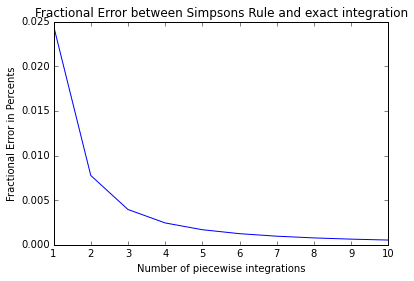

In [99]:
plt.plot([1,2,3,4,5,6,7,8,9,10], y_plot)
plt.xlabel('Number of piecewise integrations')
plt.ylabel('Fractional Error in Percents')
plt.title('Fractional Error between Simpsons Rule and exact integration')